# 🚀 Deteksi Outlier dengan ABOD:  
### Mendeteksi & Membersihkan *"Data Ganjil"* (Outlier) dari Database PostgreSQL  

Selamat datang di dokumentasi **proyek sains data**!  
Dalam proyek ini, kita akan berperan sebagai seorang **detektif data**.  

🔍 **Misi kita:**  
Menemukan data-data yang *aneh* atau *ganjil* (sering disebut **outlier**) dalam kumpulan data,  
lalu **membersihkannya** dan **menyimpan kembali** data yang sudah bersih ke dalam **database PostgreSQL**.  

---

## 🛠️ Alat yang Kita Gunakan
- **ABOD (Angle-Based Outlier Detection)** → untuk **presisi** dalam mendeteksi outlier.  
- **PyCaret** → untuk **kecepatan** eksperimen dan otomatisasi.  
- **Matplotlib** → untuk **visualisasi** temuan kita.  

---

## 🕵️‍♀️ Mari Kita Mulai Petualangannya!
Data bersih = wawasan lebih tajam ✨  
Siap menjadi detektif data sejati? Yuk kita mulai perjalanan ini!


In [1]:
import pandas as pd
from sqlalchemy import create_engine
from pycaret.anomaly import *

## 🌐 Langkah 1: Membangun Jembatan ke Gudang Data (PostgreSQL)

Sebelum kita bisa menganalisis data, kita harus **mengambilnya terlebih dahulu** dari "gudang" penyimpanannya:  
yaitu **database PostgreSQL**.  

Kita akan membangun sebuah **jembatan virtual** menggunakan **Python** agar bisa berkomunikasi dengan database.  

---

### 🔑 Analogi Sederhana
Bayangkan data Anda ada di sebuah **brankas** 🏦 (PostgreSQL).  
Untuk membukanya, kita memerlukan **kunci dan kode rahasia** (🔐 kredensial database).  
Setelah brankas terbuka, kita bisa mengambil isi di dalamnya untuk dianalisis.  

---

### 📜 Contoh Koneksi dengan Python
Kita bisa menggunakan pustaka **SQLAlchemy** atau **psycopg2**.  
Berikut contoh dengan `SQLAlchemy`:  

```python
from sqlalchemy import create_engine
import pandas as pd

# 🔑 Kredensial database (sesuaikan dengan milik Anda)
user = "username"
password = "password"
host = "localhost"
port = "5432"
database = "nama_database"

# 🚪 Membangun koneksi ke PostgreSQL
engine = create_engine(f"postgresql://{user}:{password}@{host}:{port}/{database}")

# 📂 Mengambil data dari sebuah tabel
df = pd.read_sql("SELECT * FROM nama_tabel", engine)

print(df.head())  # Menampilkan 5 baris pertama


In [ ]:
db_user = 'postgres'
db_password = '123456789'
db_host = 'localhost'
db_port = '5432'
db_name = 'iris_data'
table_name = 'iris_data'      
new_table_name = 'iris_data_tanpaoutlier' 

# Membuat connection string
db_string = f"postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}"

# Membuat koneksi dan mengambil data
try:
    engine = create_engine(db_string)
    query = f"SELECT * FROM {table_name}"
    df = pd.read_sql(query, engine)
    print("✅ Koneksi dan pengambilan data dari PostgreSQL berhasil!")
except Exception as e:
    print(f"❌ Terjadi kesalahan koneksi: {e}")
    exit()

# Simpan data asli untuk jaga-jaga jika perlu menggabungkan kembali kolom non-numerik
df_original = df.copy()


✅ Koneksi dan pengambilan data dari PostgreSQL berhasil!


## 📐 Langkah 2: Metode Detektif Presisi (ABOD)

Sekarang saatnya kita gunakan alat canggih pertama kita:  
**Angle-Based Outlier Detection (ABOD)** untuk menemukan data yang *aneh*.  

---

### 🌌 Analogi Sederhana
Bayangkan data kita adalah sekumpulan **bintang di langit** ✨.  
- Data normal → membentuk gugusan bintang yang padat.  
- Outlier → bintang yang posisinya terpencil, menyendiri, dan *aneh*.  

ABOD bekerja dengan cara melihat **sudut pandang** dari setiap bintang.  
Jika sebuah bintang memiliki **sudut pandang sempit** terhadap bintang-bintang lain,  
itulah tanda bahwa dia **ganjil** → kemungkinan besar adalah **outlier**.  

---

### ⚙️ Implementasi ABOD dengan PyOD

Kode berikut melakukan langkah-langkah penting:  
1. **Pilih hanya kolom numerik** (karena ABOD hanya bisa bekerja dengan data angka).  
2. **Latih model ABOD** dengan asumsi 10% data adalah outlier.  
3. **Tandai data**: 1 = outlier, 0 = normal.  
4. **Bersihkan dataset** dengan menghapus baris yang merupakan outlier.  

```python
from pyod.models.abod import ABOD

# 🔢 Pilih hanya kolom numerik
df_numeric = df.select_dtypes(include=['number'])

if df_numeric.empty:
    print("❌ Tidak ada kolom numerik untuk deteksi outlier.")
    exit()
else:
    # 🧪 Inisialisasi dan latih model ABOD
    clf = ABOD(contamination=0.1)  # Asumsi 10% data adalah outlier
    clf.fit(df_numeric)
    
    # 🔍 Dapatkan label: 1 = outlier, 0 = normal
    outlier_labels = clf.labels_
    
    # ➕ Tambahkan label ke DataFrame asli
    df['is_outlier'] = outlier_labels
    
    # 🧹 Buat dataset baru tanpa outlier
    df_cleaned = df[df['is_outlier'] == 0].copy()
    
    # 🗑️ Hapus kolom sementara
    df_cleaned.drop('is_outlier', axis=1, inplace=True)
    
    print("\n--- Proses Deteksi Outlier Selesai ---")
    print(f"Jumlah baris data asli: {len(df)}")
    print(f"Jumlah outlier terdeteksi: {sum(outlier_labels)}")
    print(f"Jumlah baris data setelah outlier dihapus: {len(df_cleaned)}")


In [ ]:
from pyod.models.abod import ABOD
import pandas as pd # Pastikan pandas diimpor

df_numeric = df.select_dtypes(include=['number'])

if df_numeric.empty:
    print("❌ Tidak ada kolom numerik untuk deteksi outlier.")
    exit()
else:
    # Inisialisasi dan latih model ABOD
    clf = ABOD(contamination=0.1) # Asumsi 10% outlier
    clf.fit(df_numeric)
    
    # Dapatkan label outlier (1 untuk outlier, 0 untuk data normal)
    outlier_labels = clf.labels_
    
    # Tambahkan label ini ke DataFrame asli
    df['is_outlier'] = outlier_labels
    
    # Buat dataset baru dengan menghapus baris yang merupakan outlier
    df_cleaned = df[df['is_outlier'] == 0].copy()
    
    # Hapus kolom 'is_outlier' yang sudah tidak diperlukan
    df_cleaned.drop('is_outlier', axis=1, inplace=True)
    
    print("\n--- Proses Deteksi Outlier Selesai ---")
    print(f"Jumlah baris data asli: {len(df)}")
    print(f"Jumlah outlier terdeteksi: {sum(outlier_labels)}")
    print(f"Jumlah baris data setelah outlier dihapus: {len(df_cleaned)}")

    # ▼▼▼ KODE BARU UNTUK MENAMPILKAN ID OUTLIER ▼▼▼
    
    # Cek apakah kolom 'id' ada di DataFrame
    if 'id' in df.columns:
        # Filter DataFrame untuk mendapatkan baris yang merupakan outlier
        df_outliers = df[df['is_outlier'] == 1]
        
        # Cek apakah ada outlier yang ditemukan
        if not df_outliers.empty:
            # Ambil nilai dari kolom 'id' dan ubah menjadi list
            outlier_ids = df_outliers['id'].tolist()
            print(f"\n✨ ID data yang terdeteksi sebagai outlier adalah: {outlier_ids}")
        else:
            print("\n✨ Tidak ada outlier yang terdeteksi.")
    else:
        print("\nPeringatan: Kolom 'id' tidak ditemukan, tidak dapat menampilkan ID outlier.")


--- Proses Deteksi Outlier Selesai ---
Jumlah baris data asli: 150
Jumlah outlier terdeteksi: 15
Jumlah baris data setelah outlier dihapus: 135

✨ ID data yang terdeteksi sebagai outlier adalah: [1, 58, 59, 99, 101, 107, 118, 119, 120, 121, 122, 123, 132, 136, 150]


## visualisasi


Membuat visualisasi untuk 'sepal length' vs 'sepal width'...


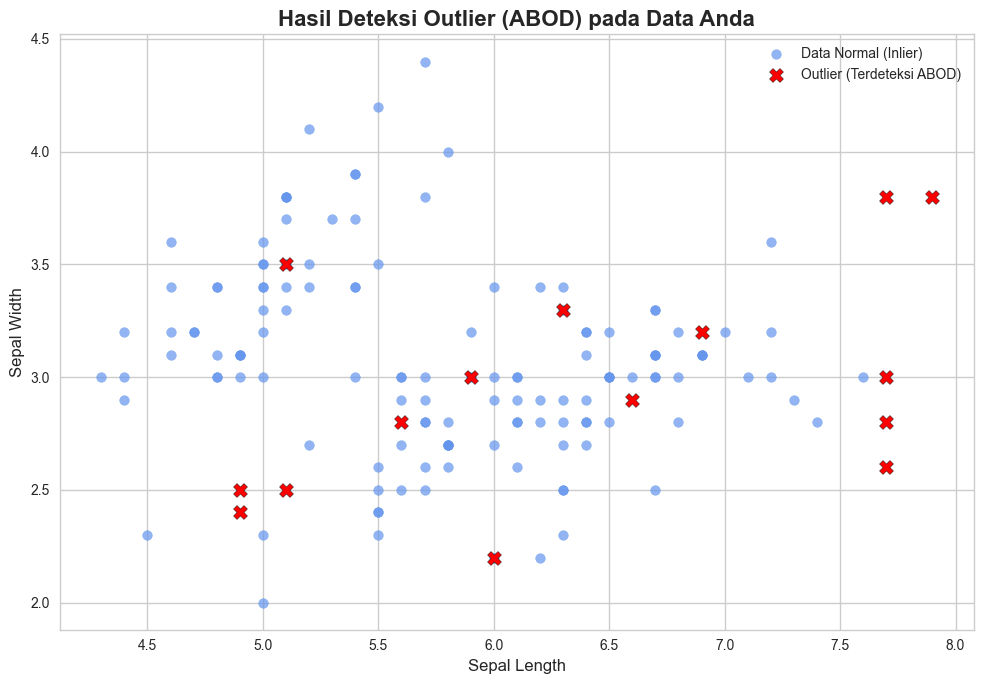

In [ ]:
import matplotlib.pyplot as plt

# --- Persiapan Data untuk Plotting ---
# Pisahkan antara data normal (inlier) dan outlier berdasarkan kolom 'is_outlier'
df_inliers = df[df['is_outlier'] == 0]
df_outliers = df[df['is_outlier'] == 1]

# --- Membuat Visualisasi Scatter Plot ---
# Pilih dua kolom numerik dari DataFrame Anda untuk dijadikan sumbu X dan Y
# Ganti nama kolom di bawah ini jika perlu
x_axis = 'sepal length'
y_axis = 'sepal width'

# Cek apakah kolom yang dipilih ada di DataFrame
if x_axis in df.columns and y_axis in df.columns:
    print(f"\nMembuat visualisasi untuk '{x_axis}' vs '{y_axis}'...")
    
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, ax = plt.subplots(figsize=(10, 7))

    # 1. Plot data normal (inliers) dengan warna biru
    ax.scatter(df_inliers[x_axis], df_inliers[y_axis], 
               c='cornflowerblue', alpha=0.7, label='Data Normal (Inlier)')

    # 2. Plot data outlier dengan warna merah menyala dan penanda 'X'
    ax.scatter(df_outliers[x_axis], df_outliers[y_axis], 
               c='red', s=100, marker='X', label='Outlier (Terdeteksi ABOD)', edgecolor='black')

    # --- Menambahkan Judul dan Label agar Mudah Dibaca ---
    ax.set_title(f'Hasil Deteksi Outlier (ABOD) pada Data Anda', fontsize=16, fontweight='bold')
    ax.set_xlabel(x_axis.replace('_', ' ').title(), fontsize=12)
    ax.set_ylabel(y_axis.replace('_', ' ').title(), fontsize=12)
    ax.legend()
    ax.grid(True)

    plt.tight_layout()
    plt.show() # Menampilkan plot
else:
    print(f"❌ Gagal membuat visualisasi: Kolom '{x_axis}' atau '{y_axis}' tidak ditemukan.")

## 💾 Langkah 3: Menyimpan Data Bersih ke PostgreSQL

Setelah kita berhasil **mendeteksi dan menghapus outlier**,  
saatnya kita **menyimpan kembali data bersih** ke dalam PostgreSQL.  

---

### 🛡️ Prinsip Utama
Kita akan menyimpan hasil pembersihan ke **tabel baru** agar data asli tetap aman.  
- `if_exists='replace'` → jika tabel sudah ada, akan diganti dengan tabel baru.  
- `if_exists='fail'` → proses akan gagal jika tabel sudah ada (opsi lebih aman).  

Dengan strategi ini, kita tidak akan merusak data asli di database.  

---

### ⚙️ Implementasi dalam Python

```python
try:
    # --- OPSI 1: MENYIMPAN KE TABEL BARU (PALING AMAN) ---
    # DataFrame 'df_cleaned' akan disimpan ke tabel baru bernama 'nama_tabel_bersih_anda'
    # if_exists='replace': Jika tabel sudah ada, akan dihapus dan dibuat ulang.
    # if_exists='fail': Proses akan gagal jika tabel sudah ada (lebih aman).
    df_cleaned.to_sql(new_table_name, engine, if_exists='replace', index=False)
    print(f"\n✅ Data bersih berhasil disimpan ke tabel baru: '{new_table_name}'")
except Exception as e:
    print(f"❌ Gagal menyimpan data ke PostgreSQL: {e}")


In [19]:
try:
    # --- OPSI 1: MENYIMPAN KE TABEL BARU (PALING AMAN) ---
    # DataFrame 'df_cleaned' akan disimpan ke tabel baru bernama 'nama_tabel_bersih_anda'
    # if_exists='replace': Jika tabel sudah ada, akan dihapus dan dibuat ulang.
    # if_exists='fail': Proses akan gagal jika tabel sudah ada (lebih aman).
    df_cleaned.to_sql(new_table_name, engine, if_exists='replace', index=False)
    print(f"\n✅ Data bersih berhasil disimpan ke tabel baru: '{new_table_name}'")
except Exception as e:
    print(f"❌ Gagal menyimpan data ke PostgreSQL: {e}")



✅ Data bersih berhasil disimpan ke tabel baru: 'iris_data_tanpaoutlier'


## menampilan keseluruhan data yang sudah bersih

In [ ]:
import pandas as pd
from sqlalchemy import create_engine
from IPython.display import display

# --- Gunakan informasi yang sama seperti sebelumnya ---
db_user = 'postgres'
db_password = '123456789'
db_host = 'localhost'
db_port = '5432'
db_name = 'iris_data'

# --- PENTING: Arahkan ke nama tabel yang sudah bersih ---
table_name_bersih = 'iris_data_tanpaoutlier' 

# Membuat connection string
db_string = f"postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}"

# ===================================================================
# LANGKAH 2: AKSES DAN TAMPILKAN DATA BERSIH
# ===================================================================

try:
    engine = create_engine(db_string)
    
    # Membuat query SQL untuk mengambil SEMUA data dari tabel bersih
    query_bersih = f"SELECT * FROM {table_name_bersih}"
    
    # Membaca data ke dalam DataFrame baru
    df_bersih_dari_db = pd.read_sql(query_bersih, engine)
    
    print(f"✅ Berhasil mengambil data dari tabel bersih: '{table_name_bersih}'")
    print(f"Jumlah baris data setelah dibersihkan: {len(df_bersih_dari_db)}")
    
    # --- Menampilkan tabel data bersih di notebook Anda ---
    print("\nBerikut adalah tampilan data yang sudah bersih dari outlier:")

    # ▼▼▼ KODE BARU DITAMBAHKAN DI SINI ▼▼▼
    # Atur pandas untuk menampilkan semua baris
    pd.set_option('display.max_rows', None)

    display(df_bersih_dari_db)

    # Kembalikan ke setelan awal (opsional, tapi disarankan)
    pd.reset_option('display.max_rows')

except Exception as e:
    print(f"❌ Terjadi kesalahan: {e}")
    print("Pastikan nama tabel bersih ('new_table_name') sudah benar dan skrip pembersihan sudah berhasil dijalankan.")

✅ Berhasil mengambil data dari tabel bersih: 'iris_data_tanpaoutlier'
Jumlah baris data setelah dibersihkan: 135

Berikut adalah tampilan data yang sudah bersih dari outlier:


id  sepal length  sepal width  petal length  petal width
0      2           4.9          3.0           1.4          0.2
1      3           4.7          3.2           1.3          0.2
2      4           4.6          3.1           1.5          0.2
3      5           5.0          3.6           1.4          0.2
4      6           5.4          3.9           1.7          0.4
5      7           4.6          3.4           1.4          0.3
6      8           5.0          3.4           1.5          0.2
7      9           4.4          2.9           1.4          0.2
8     10           4.9          3.1           1.5          0.1
9     11           5.4          3.7           1.5          0.2
10    12           4.8          3.4           1.6          0.2
11    13           4.8          3.0           1.4          0.1
12    14           4.3          3.0           1.1          0.1
13    15           5.8          4.0           1.2          0.2
14    16           5.7          4.4           1.5          0.4
15    17           5.4          3.9           1.3          0.4
16    18           5.1          3.5           1.4          0.3
17    19           5.7          3.8           1.7          0.3
18    20           5.1          3.8           1.5          0.3
19    21           5.4          3.4           1.7          0.2
20    22           5.1          3.7           1.5          0.4
21    23           4.6          3.6           1.0          0.2
22    24           5.1          3.3           1.7          0.5
23    25           4.8          3.4           1.9          0.2
24    26           5.0          3.0           1.6          0.2
25    27           5.0          3.4           1.6          0.4
26    28           5.2          3.5           1.5          0.2
27    29           5.2          3.4           1.4          0.2
28    30           4.7          3.2           1.6          0.2
29    31           4.8          3.1           1.6          0.2
30    32           5.4          3.4           1.5          0.4
31    33           5.2          4.1           1.5          0.1
32    34           5.5          4.2           1.4          0.2
33    35           4.9          3.1           1.5          0.1
34    36           5.0          3.2           1.2          0.2
35    37           5.5          3.5           1.3          0.2
36    38           4.9          3.1           1.5          0.1
37    39           4.4          3.0           1.3          0.2
38    40           5.1          3.4           1.5          0.2
39    41           5.0          3.5           1.3          0.3
40    42           4.5          2.3           1.3          0.3
41    43           4.4          3.2           1.3          0.2
42    44           5.0          3.5           1.6          0.6
43    45           5.1          3.8           1.9          0.4
44    46           4.8          3.0           1.4          0.3
45    47           5.1          3.8           1.6          0.2
46    48           4.6          3.2           1.4          0.2
47    49           5.3          3.7           1.5          0.2
48    50           5.0          3.3           1.4          0.2
49    51           7.0          3.2           4.7          1.4
50    52           6.4          3.2           4.5          1.5
51    53           6.9          3.1           4.9          1.5
52    54           5.5          2.3           4.0          1.3
53    55           6.5          2.8           4.6          1.5
54    56           5.7          2.8           4.5          1.3
55    57           6.3          3.3           4.7          1.6
56    60           5.2          2.7           3.9          1.4
57    61           5.0          2.0           3.5          1.0
58    62           5.9          3.0           4.2          1.5
59    63           6.0          2.2           4.0          1.0
60    64           6.1          2.9           4.7          1.4
61    65           5.6          2.9           3.6          1.3
62    66           6.7          3.1  